In [46]:
import pandas as pd
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv("./Downloads/VOF.L.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,272.0,275.00,272.00,273.25,233.939148,170046
1,2017-01-04,272.0,275.00,272.00,272.75,233.511093,107823
2,2017-01-05,272.0,274.50,270.25,272.50,233.297043,391623
3,2017-01-06,272.5,273.75,266.00,273.00,233.725098,464329
4,2017-01-09,273.0,273.50,270.00,273.50,234.153183,276108


In [48]:
df = pd.DataFrame(list(data['Open']), index=data['Date'], columns=['Open'])

In [49]:
df

,Open
Date,
2017-01-03,272.0
2017-01-04,272.0
2017-01-05,272.0
2017-01-06,272.5
2017-01-09,273.0
...,...
2022-03-25,502.0
2022-03-28,502.0
2022-03-29,502.0


In [50]:
data= df[:365]

In [51]:
data.shape

(365, 1)

In [52]:
data.isnull().sum()

Open    0
dtype: int64

In [53]:
data=data.dropna(axis=0)

In [54]:
data.shape

(365, 1)

In [55]:
data=data['Open'].values

In [56]:
data[:5]

array([272. , 272. , 272. , 272.5, 273. ])

In [57]:
data= data.reshape(-1,1)

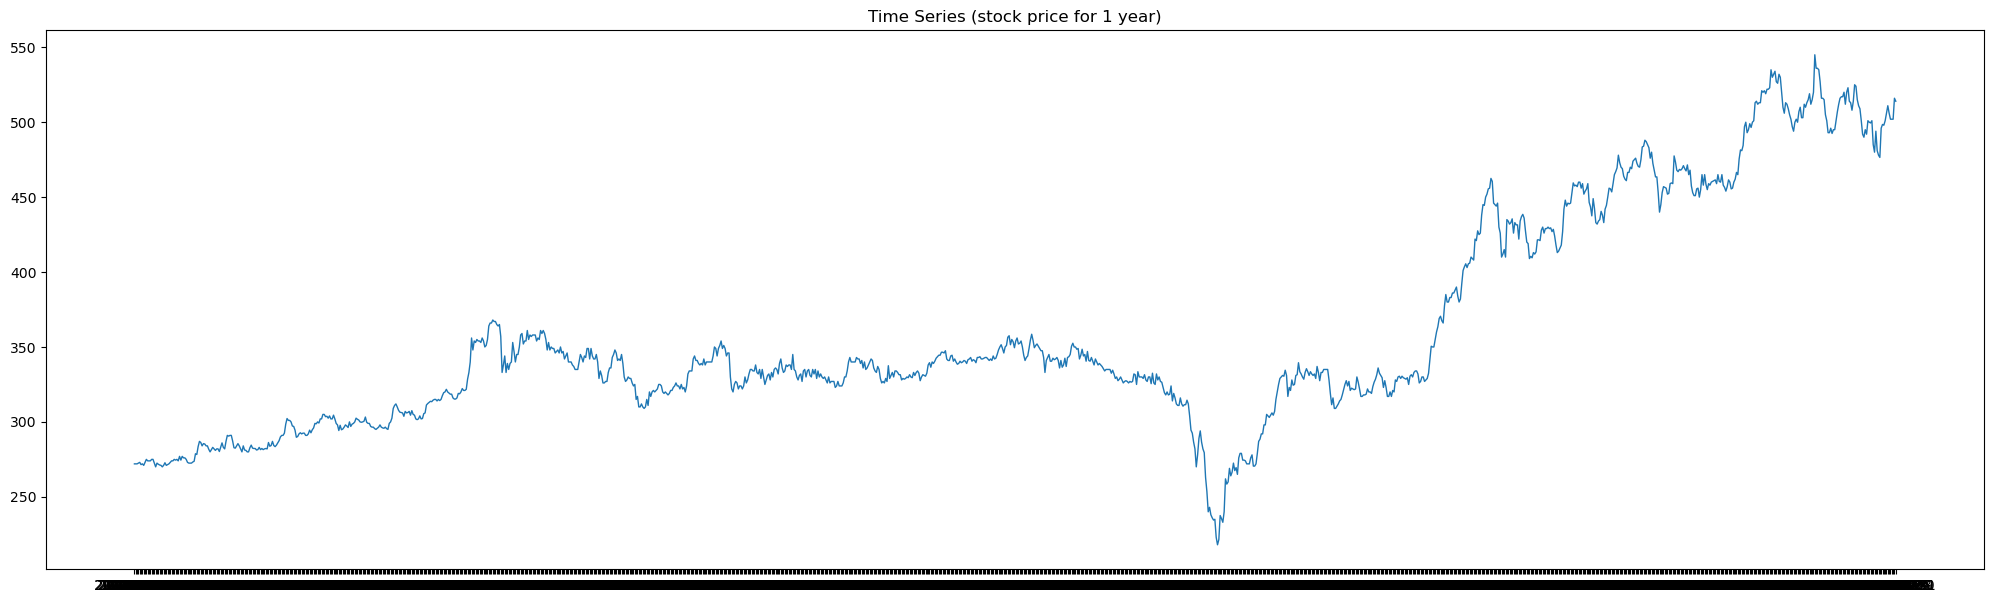

In [136]:
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (stock price for 1 year)")
plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [60]:
data_scaled[:5]

array([[0.16513761],
       [0.16513761],
       [0.16513761],
       [0.16666667],
       [0.16819572]])

In [61]:
data_scaled.shape

(1328, 1)

In [62]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [63]:
out[:10]

[array([0.16207951]),
 array([0.15902141]),
 array([0.16207951]),
 array([0.16743119]),
 array([0.16207951]),
 array([0.16360856]),
 array([0.16513761]),
 array([0.16819572]),
 array([0.17125382]),
 array([0.17125382])]

In [64]:
import numpy as np

In [65]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [66]:
len(data)*0.65

237.25

In [67]:
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]    
y_train = out[:237]    
y_test= out[237:]

In [68]:
inp.shape

(1308, 20, 1)

In [69]:
x_test.shape

(1071, 20, 1)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [72]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [73]:
model.fit(x_train,y_train,epochs=300, verbose=1, )
model.save('.\Download')

Epoch 1/300
8/8 [==============================] - 7s 28ms/step - loss: 0.0213
Epoch 2/300
8/8 [==============================] - 0s 27ms/step - loss: 0.0033
Epoch 3/300
8/8 [==============================] - 0s 27ms/step - loss: 0.0023
Epoch 4/300
8/8 [==============================] - 0s 28ms/step - loss: 0.0013
Epoch 5/300
8/8 [==============================] - 0s 30ms/step - loss: 9.2065e-04
Epoch 6/300
8/8 [==============================] - 0s 28ms/step - loss: 8.3950e-04
Epoch 7/300
8/8 [==============================] - 0s 29ms/step - loss: 7.9268e-04
Epoch 8/300
8/8 [==============================] - 0s 30ms/step - loss: 7.2231e-04
Epoch 9/300
8/8 [==============================] - 0s 27ms/step - loss: 6.7025e-04
Epoch 10/300
8/8 [==============================] - 0s 29ms/step - loss: 6.1088e-04
Epoch 11/300
8/8 [==============================] - 0s 28ms/step - loss: 5.5822e-04
Epoch 12/300
8/8 [==============================] - 0s 30ms/step - loss: 5.1343e-04
Epoch 13/300
8/8 

INFO:tensorflow:Assets written to: .\Download\assets


INFO:tensorflow:Assets written to: .\Download\assets


In [74]:
# model.evaluate(x_test, y_test)

In [75]:
print("Predicted Value",model.predict(x_train)[4][0])
print("Expected value",y_train[4][0])

8/8 [==============================] - 2s 9ms/step
Predicted Value 0.16419455
Expected value 0.1620795107033639


In [76]:
predictions=model.predict(x_test)

34/34 [==============================] - 0s 10ms/step


In [77]:
print("Predicted Value",predictions[2][0])
print("Expected Value",y_test[2][0])

Predicted Value 0.43395862
Expected Value 0.41590214067278286


In [78]:
predictions.shape


(1071, 1)

In [79]:
y_test.shape

(1071, 1)

In [80]:
pred_df=pd.DataFrame(predictions)

In [81]:
pred_df['TrueValues']=y_test

In [82]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [83]:
pred_df_new

,Predictions,TrueValues
0,0.433372,0.412844
1,0.436012,0.418960
2,0.433959,0.415902
3,0.428658,0.415902
4,0.423183,0.412844
...,...,...
1066,1.526570,0.868502
1067,1.528999,0.868502
1068,1.525667,0.868502
1069,1.522004,0.911315


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

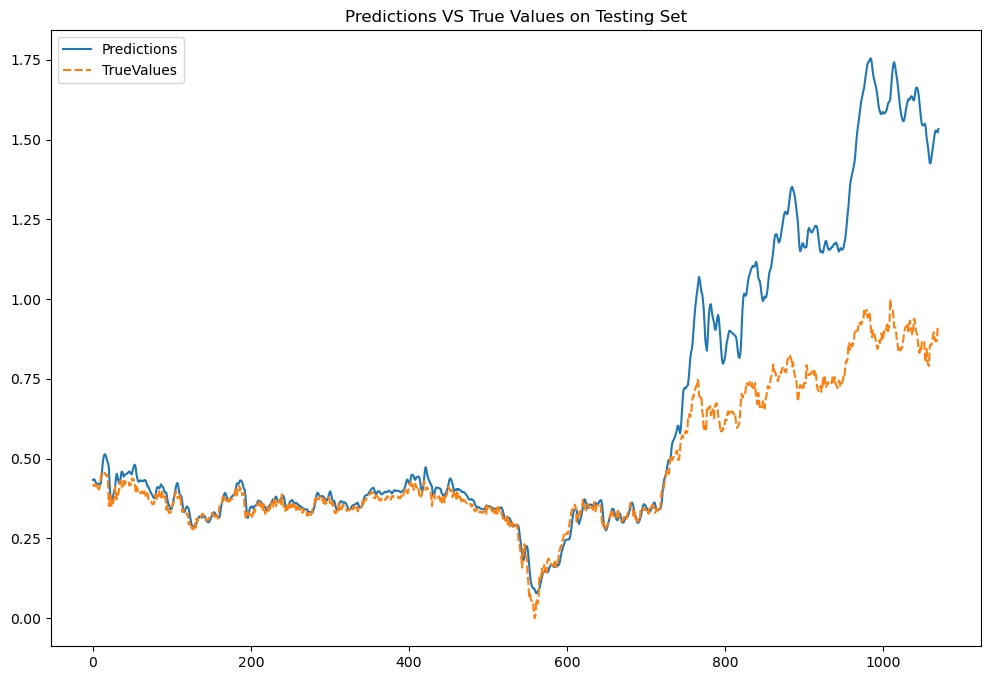

In [84]:
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testing Set")

In [107]:
data_scaled.shape

(1328, 1)

In [108]:
x_input=data_scaled[:20]

In [109]:
x_input.shape

(20, 1)

In [111]:
# now reshaping the data
x_input = x_input.reshape(1, -1)

In [112]:
x_input.shape

(1, 20)

In [113]:
# x_input = x_input.reshape((1, 20,1))
# yhat = model.predict(x_input, verbose=0)

In [114]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [129]:
from numpy import array
list_output=[]
n_steps=20
i=0
while(i<30):
    if(len(temp_input)>20):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        list_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        list_output.extend(yhat.tolist())
        i=i+1
    print(list_output)

0 day input [0.16513761 0.16666667 0.16819572 0.16360856 0.16513761 0.16207951
 0.16819572 0.17431193 0.17125382 0.17125382 0.17125382 0.17431193
 0.17431193 0.16666667 0.15902141 0.16666667 0.16437309 0.16284404
 0.1636484  0.1636849 ]
0 day output [[0.16409776]]
[[0.16409775614738464]]
1 day input [0.16666667 0.16819572 0.16360856 0.16513761 0.16207951 0.16819572
 0.17431193 0.17125382 0.17125382 0.17125382 0.17431193 0.17431193
 0.16666667 0.15902141 0.16666667 0.16437309 0.16284404 0.1636484
 0.1636849  0.16409776]
1 day output [[0.16471967]]
[[0.16409775614738464], [0.16471967101097107]]
2 day input [0.16819572 0.16360856 0.16513761 0.16207951 0.16819572 0.17431193
 0.17125382 0.17125382 0.17125382 0.17431193 0.17431193 0.16666667
 0.15902141 0.16666667 0.16437309 0.16284404 0.1636484  0.1636849
 0.16409776 0.16471967]
2 day output [[0.16543019]]
[[0.16409775614738464], [0.16471967101097107], [0.1654301881790161]]
3 day input [0.16360856 0.16513761 0.16207951 0.16819572 0.17431193

In [132]:
day_new = np.arange(1,1329)
day_pred = np.arange(1329,1359)

ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

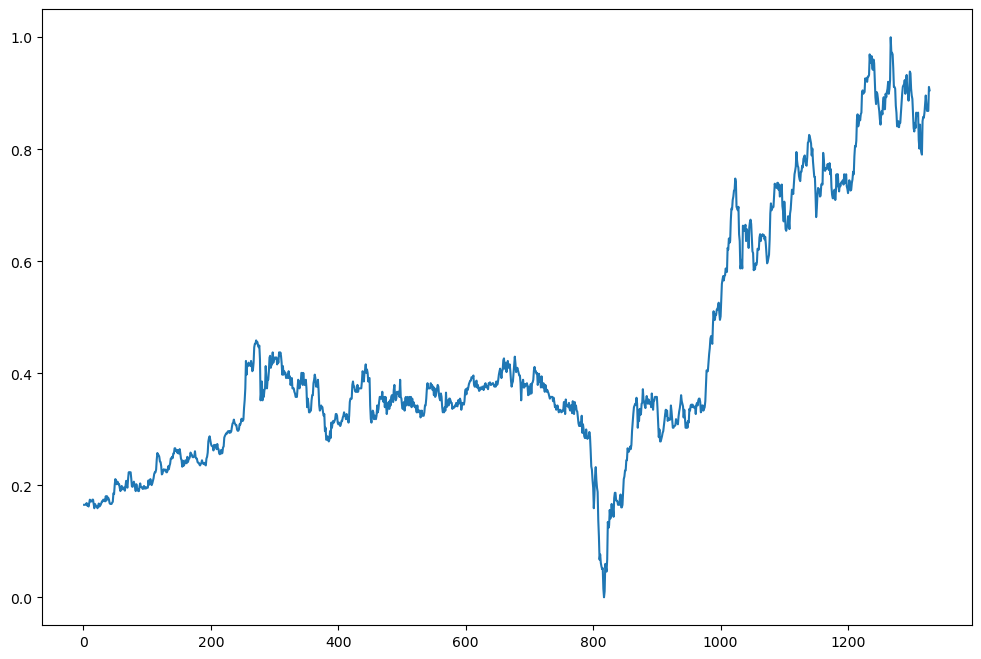

In [133]:
plt.figure(figsize=(12,8))
plt.plot(day_new,data_scaled)
plt.plot(day_pred,lst_output)

In [134]:
data_scaled[:5]

array([[0.16513761],
       [0.16513761],
       [0.16513761],
       [0.16666667],
       [0.16819572]])

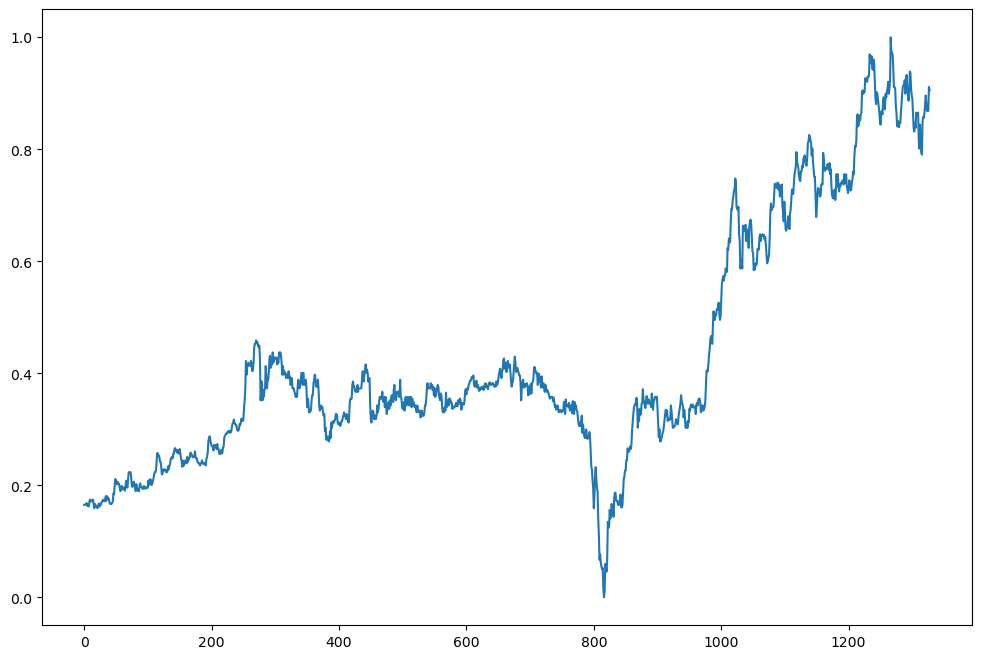

In [135]:
df3 = data_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)